In [8]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("datasets/Chamau_2001-2024.csv")

# filter out rows without a response variable
df = df[df["FN2O_L3.1_L3.3_CUT_50_QCF0"].notna()]

cols = [
    # Target
    "FN2O_L3.1_L3.3_CUT_50_QCF0",

    # Timestamp
    "TIMESTAMP_MIDDLE",
    
    # Predictors
    "NEE_L3.1_L3.3_CUT_50_QCF_gfRF",
    "GPP_NT_CUT_50_gfRF",
    "RECO_NT_CUT_50_gfRF",
    "SW_IN_T1_2_1",
    "TA_T1_2_1",
    "PREC_RAIN_TOT_GF1_0.5_1",
    "VPD_T1_2_1",
    "SWC_GF1_0.05_1",
    "SWC_GF1_0.15_1",
    "TS_GF1_0.04_1",
    "TS_GF1_0.15_1",
    "MGMT_MOWING",
    "MGMT_FERT_ORG",
    "MGMT_FERT_MIN",
    "MGMT_GRAZING",
    "MGMT_SOILCULTIVATION"
]

chamau = df[cols]

rename_map = {
    "FN2O_L3.1_L3.3_CUT_50_QCF0": "N2O_Flux",
    "TIMESTAMP_MIDDLE": "Timestamp",
    "NEE_L3.1_L3.3_CUT_50_QCF_gfRF": "NEE", # Net CO₂ exchange between field and atmosphere (positive = CO₂ released, negative = CO₂ uptake)
    "GPP_NT_CUT_50_gfRF": "GPP",            # Total CO₂ fixed by photosynthesis (proxy for plant growth)
    "RECO_NT_CUT_50_gfRF": "RECO",          # CO₂ emitted via respiration of plants and soil organisms
    "SW_IN_T1_2_1": "SolarRadiation",
    "TA_T1_2_1": "AirTemp",
    "PREC_RAIN_TOT_GF1_0.5_1": "Precipitation",
    "VPD_T1_2_1": "VPD",                    # Vapor pressure deficit
    "SWC_GF1_0.05_1": "SoilWater_5cm",
    "SWC_GF1_0.15_1": "SoilWater_15cm",
    "TS_GF1_0.04_1": "SoilTemp_4cm",
    "TS_GF1_0.15_1": "SoilTemp_15cm",
    "MGMT_MOWING": "Mowing",
    "MGMT_FERT_ORG": "FertilizerOrganic",
    "MGMT_FERT_MIN": "FertilizerMineral",
    "MGMT_GRAZING": "Grazing",
    "MGMT_SOILCULTIVATION": "SoilCultivation",
}

chamau = chamau.rename(columns=rename_map)
chamau["Timestamp"] = pd.to_datetime(chamau["Timestamp"])

In [4]:
chamau.head(5)

,N2O_Flux,Timestamp,NEE,GPP,RECO,SolarRadiation,AirTemp,Precipitation,VPD,SoilWater_5cm,SoilWater_15cm,SoilTemp_4cm,SoilTemp_15cm,Mowing,FertilizerOrganic,FertilizerMineral,Grazing,SoilCultivation
123525,1.015646,2012-01-18 10:45:00,0.384162,2.155036,2.539198,292.290008,-3.33910,0.0,0.051046,57.517658,46.201393,0.09065,1.6995,0.0,1.0,0.0,0.0,0.0
123527,1.980485,2012-01-18 11:45:00,-1.633831,4.347880,2.714049,343.850006,-1.23810,0.0,0.071209,57.513504,46.197323,0.10388,1.6570,0.0,1.0,0.0,0.0,0.0
123528,2.118028,2012-01-18 12:15:00,-3.494060,6.304054,2.809994,356.149994,-0.05813,0.0,0.099947,57.418747,46.200577,0.08519,1.6725,0.0,1.0,0.0,0.0,0.0
123529,2.612216,2012-01-18 12:45:00,-2.778956,5.651104,2.872148,386.369995,0.72053,0.0,0.142029,57.380260,46.206280,0.08846,1.6708,0.0,1.0,0.0,0.0,0.0
123530,2.577871,2012-01-18 13:15:00,-1.157215,4.088506,2.931292,375.429993,1.47070,0.0,0.175308,57.377155,46.203831,0.09295,1.6661,0.0,1.0,0.0,0.0,0.0


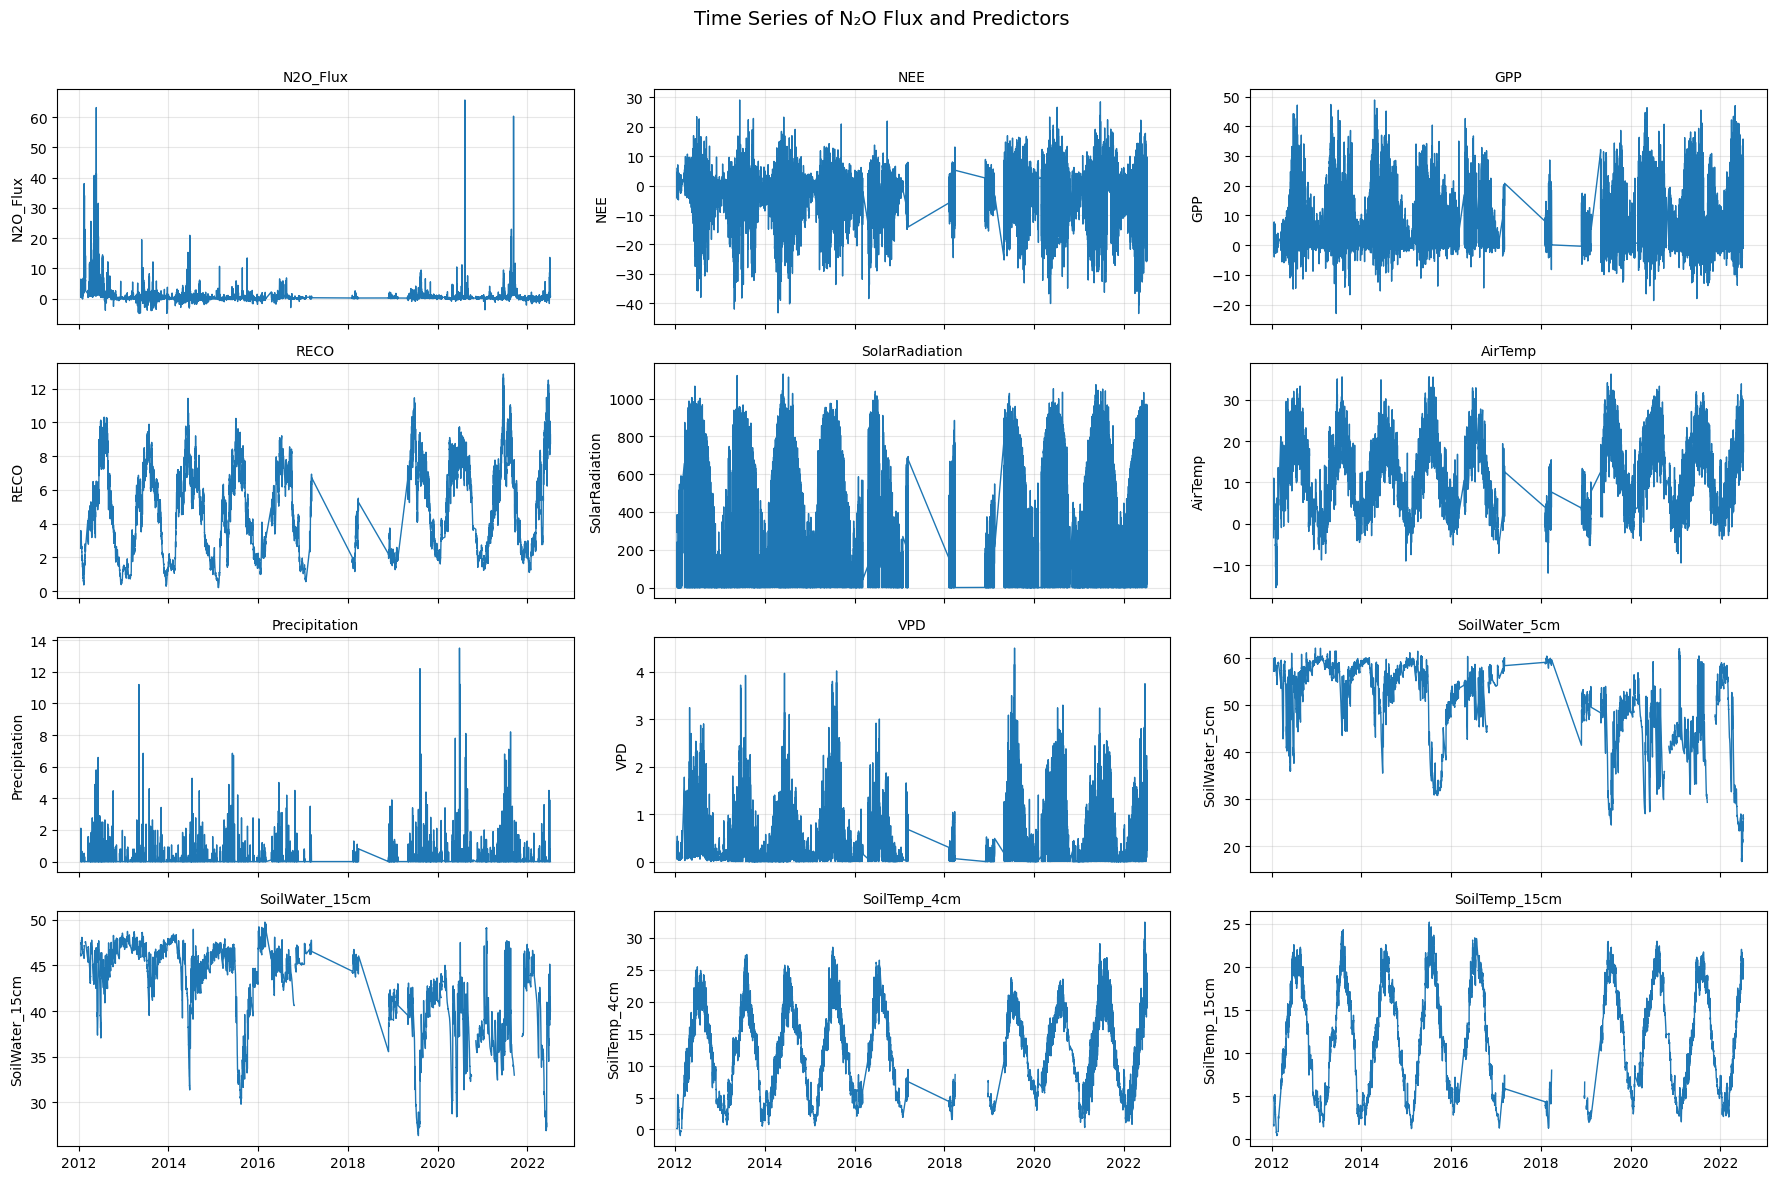

In [9]:
# Variables to plot (excluding Timestamp)
vars_to_plot = [
    "N2O_Flux", "NEE", "GPP", "RECO",
    "SolarRadiation", "AirTemp", "Precipitation",
    "VPD", "SoilWater_5cm", "SoilWater_15cm",
    "SoilTemp_4cm", "SoilTemp_15cm",
    "Mowing", "FertilizerOrganic", "FertilizerMineral", "Grazing", "SoilCultivation"
]

# Create subplots grid
n_cols = 3
n_rows = int(len(vars_to_plot) / n_cols) + (len(vars_to_plot) % n_cols > 0)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 12), sharex=True)
axes = axes.flatten()

# Plot each variable
for i, var in enumerate(vars_to_plot):
    ax = axes[i]
    ax.plot(chamau["Timestamp"], chamau[var], lw=1)
    ax.set_title(var, fontsize=10)
    ax.set_ylabel(var)
    ax.grid(True, alpha=0.3)

# Remove empty subplots if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Time Series of N₂O Flux and Predictors", fontsize=14)
fig.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

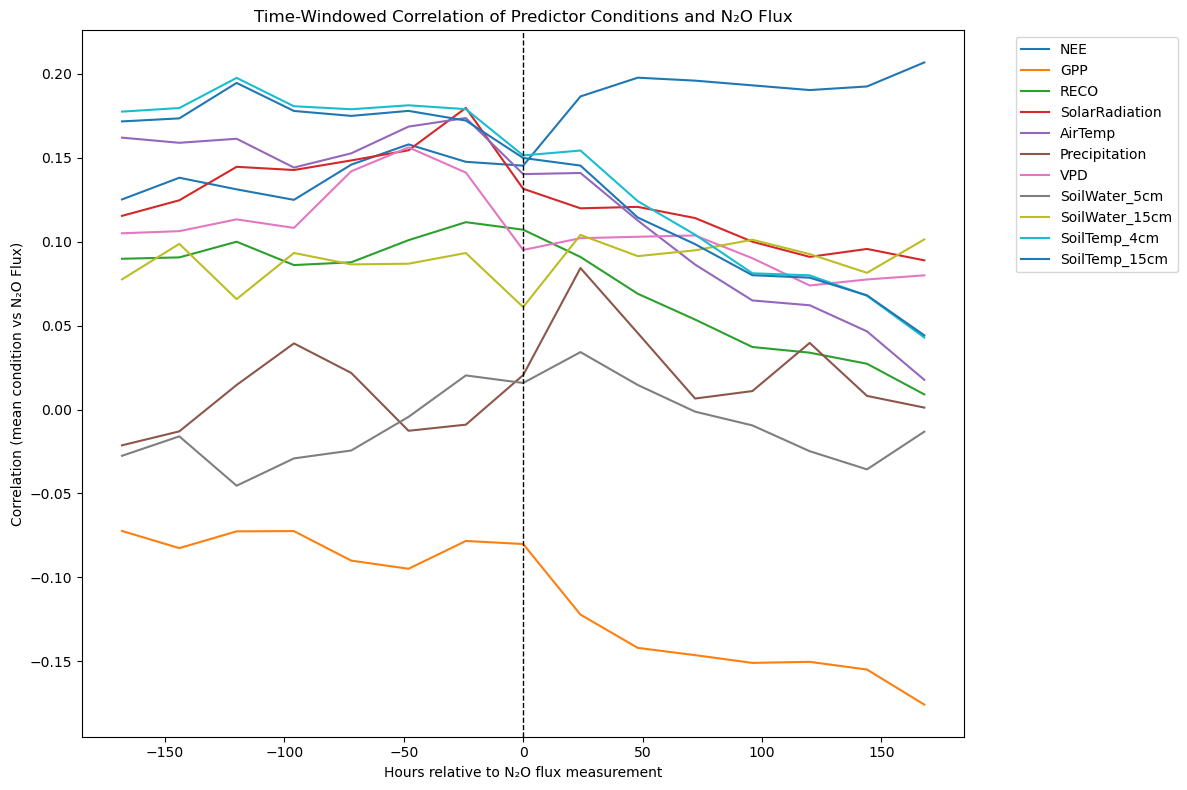

In [32]:
chamau_time_index = chamau.copy()
chamau_time_index = chamau_time_index.set_index("Timestamp")
# chamau_time_index = chamau_time_index[chamau_time_index["N2O_Flux"] > 10].copy()

predictors = [
    "NEE", "GPP", "RECO",
    "SolarRadiation", "AirTemp", "Precipitation", "VPD",
    "SoilWater_5cm", "SoilWater_15cm", "SoilTemp_4cm", "SoilTemp_15cm",
    #"Mowing", "FertilizerOrganic", "FertilizerMineral", "Grazing", "SoilCultivation"
]
target = "N2O_Flux"

# --- Parameters ---
window_hours = 24
step_hours   = 24
max_hours    = 7*24 # one week
offsets      = range(-max_hours, max_hours + step_hours, step_hours)

# --- Precompute rolling means ---
window = f"{window_hours}h"
rolling_means = chamau_time_index[predictors].rolling(window=window, closed="left").mean()

# --- Compute lag correlations ---
lag_corrs = {}
for var in predictors:
    corrs = []
    for offset in offsets:
        shifted = rolling_means[var].shift(freq=pd.Timedelta(hours=offset))
        aligned = chamau_time_index[[target]].join(shifted.rename("past_mean"))
        corr = aligned[target].corr(aligned["past_mean"])
        corrs.append(corr)
    lag_corrs[var] = (list(offsets), corrs)

# --- Plot ---
plt.figure(figsize=(12, 8))
for var, (offsets, corrs) in lag_corrs.items():
    plt.plot(offsets, corrs, label=var)

plt.axvline(0, color="k", linestyle="--", lw=1)
plt.xlabel("Hours relative to N₂O flux measurement")
plt.ylabel("Correlation (mean condition vs N₂O Flux)")
plt.title("Time-Windowed Correlation of Predictor Conditions and N₂O Flux")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [29]:
# Ensure timestamp is datetime and sorted
chamau = chamau.sort_values("Timestamp")

# Compute time difference between consecutive timestamps
chamau["time_diff"] = chamau["Timestamp"].diff()

# Look at large gaps
print(chamau["time_diff"].describe())
chamau[chamau["time_diff"] > "3 days"].head(50)

count                        27460
mean     0 days 03:20:25.324107793
std      2 days 13:25:32.023462203
min                0 days 00:30:00
25%                0 days 00:30:00
50%                0 days 00:30:00
75%                0 days 02:00:00
max              331 days 02:00:00
Name: time_diff, dtype: object


,N2O_Flux,Timestamp,NEE,GPP,RECO,SolarRadiation,AirTemp,Precipitation,VPD,SoilWater_5cm,SoilWater_15cm,SoilTemp_4cm,SoilTemp_15cm,Mowing,FertilizerOrganic,FertilizerMineral,Grazing,SoilCultivation,time_diff
945,1.672283,2012-03-16 14:15:00,2.698231,1.462234,4.160465,656.739990,20.622999,0.0000,1.568223,54.713284,45.582417,7.170600,5.541600,0.0,0.0,0.0,0.0,0.0,18 days 03:30:00
4542,0.030938,2013-01-08 07:15:00,0.957182,0.445307,1.402488,0.000000,2.221600,0.0000,0.078406,58.865906,46.960831,5.289000,5.608100,0.0,0.0,0.0,0.0,0.0,4 days 17:00:00
6482,0.080190,2014-01-16 11:15:00,-4.075284,5.755650,1.680366,106.769997,3.378300,0.0000,0.000000,59.014748,47.599476,4.253900,4.525200,0.0,0.0,0.0,0.0,0.0,3 days 03:00:00
8524,0.028624,2015-01-17 20:15:00,0.870610,0.181119,1.051729,0.000000,1.200600,0.2634,0.000000,59.782661,47.293137,3.675300,4.153500,0.0,0.0,0.0,0.0,0.0,4 days 09:30:00
8597,0.035199,2015-02-02 11:15:00,-1.635466,2.421720,0.786254,124.309998,1.596900,0.0000,0.109698,59.985359,47.386898,2.353900,2.783200,0.0,0.0,0.0,0.0,0.0,3 days 01:00:00
8704,-0.115175,2015-03-10 12:15:00,-9.975321,14.736693,4.761372,724.940002,12.558000,0.0000,0.626232,57.774712,45.957031,4.131600,3.765400,0.0,0.0,0.0,0.0,0.0,4 days 02:00:00
8710,0.101571,2015-03-20 14:45:00,-11.152094,17.391275,6.239181,534.539978,15.056000,0.0000,0.880351,55.392349,44.762604,7.877700,6.464700,0.0,0.0,0.0,0.0,0.0,5 days 05:00:00
10204,0.840495,2015-11-02 10:15:00,-3.705963,6.996454,3.290491,70.694000,7.532600,0.0000,0.013989,42.905487,41.081913,11.272000,11.149000,0.0,0.0,0.0,0.0,0.0,3 days 18:30:00
10211,0.014971,2015-11-09 12:45:00,-19.687992,23.740062,4.052070,449.929993,18.452999,0.0000,0.728316,40.728493,40.630432,10.885000,10.091000,0.0,0.0,0.0,0.0,0.0,6 days 14:30:00
10359,0.043799,2015-12-14 11:45:00,-5.086202,6.718191,1.631989,122.809998,-1.454200,0.0000,0.004392,47.310017,43.116478,4.140900,4.744100,0.0,0.0,0.0,0.0,0.0,3 days 06:00:00


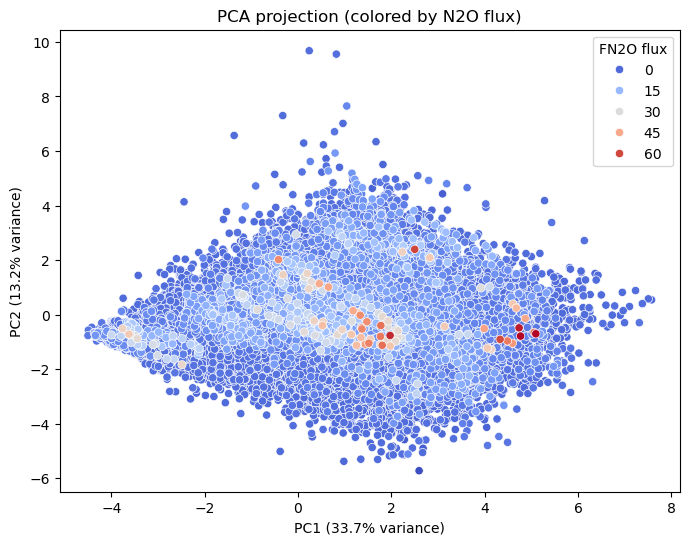

In [15]:
chamau_clean = chamau.dropna()
chamau_clean = chamau_clean.sort_values(
    by="N2O_Flux",
    ascending=True  # ascending puts zeros first, descending puts them last
)

X = chamau_clean.drop(columns=["N2O_Flux", "Timestamp"])
y = chamau_clean["N2O_Flux"]

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Standardize predictors
X_scaled = StandardScaler().fit_transform(X)

# Run PCA (2 components for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create DataFrame for plotting
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df["FN2O"] = y.values

# Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="FN2O", palette="coolwarm")
plt.title("PCA projection (colored by N2O flux)")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)")
plt.legend(title="FN2O flux", loc="best")
plt.show()


In [17]:
loadings = pd.DataFrame(
    pca.components_.T,
    index=X.columns,
    columns=["PC1", "PC2"]
)
print(loadings.sort_values("PC1", ascending=False))

                        PC1       PC2
AirTemp            0.401228  0.065236
RECO               0.389408  0.137646
SoilTemp_4cm       0.380410  0.190357
SoilTemp_15cm      0.360977  0.224282
VPD                0.309884 -0.084114
SolarRadiation     0.301707 -0.360965
GPP                0.275910 -0.470882
Mowing             0.053716 -0.005072
FertilizerOrganic  0.041809  0.102758
FertilizerMineral  0.006607 -0.021324
SoilCultivation   -0.007743  0.015824
Precipitation     -0.019935  0.203348
Grazing           -0.041335 -0.017629
NEE               -0.180133  0.562799
SoilWater_15cm    -0.220877 -0.293073
SoilWater_5cm     -0.247189 -0.274905


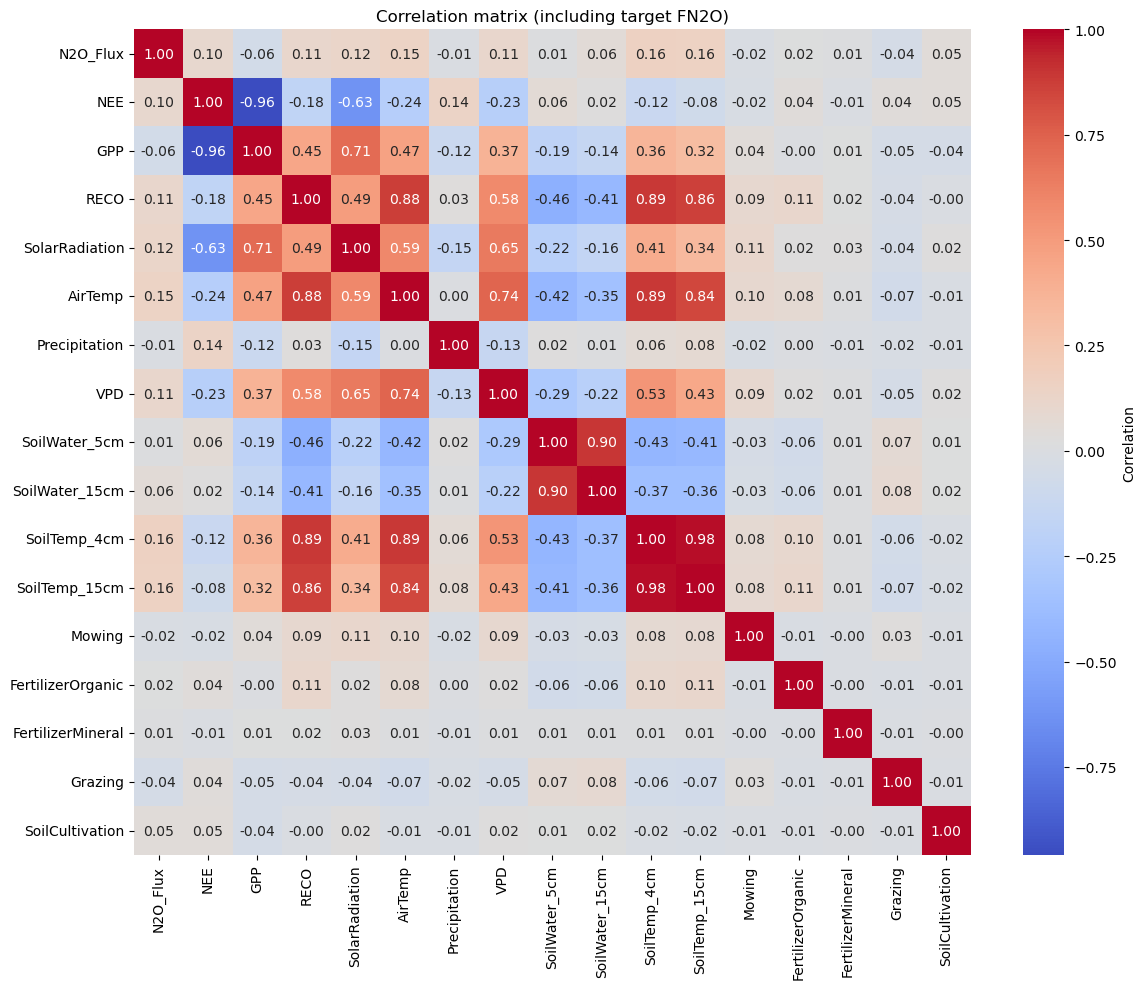

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix (Pearson by default)
corr = chamau.corr(numeric_only=True)

plt.figure(figsize=(12,10))
sns.heatmap(
    corr, 
    annot=True, fmt=".2f", cmap="coolwarm",
    cbar_kws={'label': 'Correlation'}
)
plt.title("Correlation matrix (including target FN2O)")
plt.tight_layout()
plt.show()

In [20]:
from sklearn.preprocessing import StandardScaler

# Drop or fill NaNs
X = X.dropna()
y = y.loc[X.index]

# Scale predictors
X_scaled = StandardScaler().fit_transform(X)


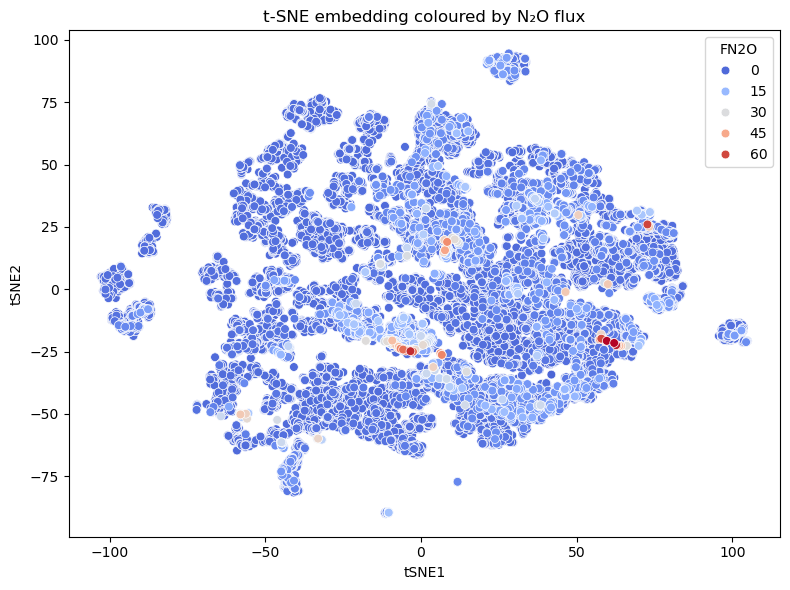

In [21]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=90, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

tsne_df = pd.DataFrame(X_tsne, columns=["tSNE1", "tSNE2"])
tsne_df["FN2O"] = y.values

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=tsne_df, x="tSNE1", y="tSNE2",
    hue="FN2O", palette="coolwarm", s=40
)
plt.title("t-SNE embedding coloured by N₂O flux")
plt.tight_layout()
plt.show()
